# Adding dependencies

In [292]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis
from sklearn import feature_extraction, linear_model, model_selection, preprocessing

#Data Import

In [293]:
dt=pd.read_csv('./sample_data/dataset_mentalHealth.csv')

In [168]:
# print(dt)

In [294]:
dt.shape

(173, 47)

Creating dataframe

In [295]:
df=pd.DataFrame(dt)

##Data naming
Here we rename the columns for better visual representation

In [296]:
dict = {'Please indicate your current employment status by selecting one of the options below:':'emply',
       '1. I found myself getting upset by quite trivial things':'Q1',
       '2. I was aware of dryness of my mouth':'Q2',
       "3. I couldn’t seem to experience any positive feeling at all":'Q3',
       '4. I experienced breathing difficulty (eg, excessively rapid breathing, breathlessness in the absence of physical exertion)':'Q4',
       "5. I just couldn't seem to get going":'Q5',
       '6.  I tended to over-react to situations':'Q6',
       '7. I had a feeling of shakiness (eg, legs going to give way)':'Q7',
       '8. I found it difficult to relax':'Q8',
       '9. I found myself in situations that made me so anxious I was most relieved when they ended':'Q9',
       '10. I felt that I had nothing to look forward to':'Q10',
       '11. I found myself getting upset rather easily':'Q11',
       '12. I felt that I was using a lot of nervous energy':'Q12',
       '13. I felt sad and depressed':'Q13',
       '14. I found myself getting impatient when I was delayed in any way (eg, lifts, traffic lights, being kept waiting)':'Q14',
       '15. I had a feeling of faintness':'Q15',
       '16. I felt that I had lost interest in just about everything':'Q16',
       "17. I felt I wasn't worth much as a person":'Q17',
       '18. I felt that I was rather touchy':'Q18',
       '19. I perspired noticeably (eg, hands sweaty) in the absence of high temperatures or physical exertion':'Q19',
       '20. I felt scared without any good reason':'Q20',
       "21. I felt that life wasn't worthwhile":'Q21',
       '22. I found it hard to wind down':'Q22',
       '23. I had difficulty in swallowing':'Q23',
       "24. I couldn't seem to get any enjoyment out of the things I did":'Q24',
       '25. I was aware of the action of my heart in the absence of physical exertion (eg, sense of heart rate increase, heart missing a beat)':'Q25',
       '26. I felt down-hearted and blue':'Q26',
       '27. I found that I was very irritable':'Q27',
       '28. I felt I was close to panic':'Q28',
       '29. I found it hard to calm down after something upset me':'Q29',
       "30. I feared that I would be 'thrown' by some trivial but unfamiliar task":'Q30',
       '31. I was unable to become enthusiastic about anything':'Q31',
       '32. I found it difficult to tolerate interruptions to what I was doing':'Q32',
       '33. I was in a state of nervous tension':'Q33',
       '34. I felt I was pretty worthless':'Q34',
       '35. I was intolerant of anything that kept me from getting on with what I was doing':'Q35',
       '36. I felt terrified':'Q36',
       '37. I could see nothing in the future to be hopeful about':'Q37',
       '38. I felt that life was meaningless':'Q38',
       '39. I found myself getting agitated':'Q39',
       '40. I was worried about situations in which I might panic and make a fool of myself':'Q40',
       '41. I experienced trembling (eg, in the hands)':'Q41',
       '42. I found it difficult to work up the initiative to do things':'Q42',
       'Special Question: Please provide information about yourself and indicate how you have been feeling recently.':'Review'
        }

In [297]:
df.rename(columns=dict,
          inplace=True)

In [298]:
x = dt.iloc[:,3:-2]
y = dt.iloc[:,-1].values
z = df.iloc[:,-2].values

In [299]:
print(z)

["I have been doing good and by God's grace nothing is bothering me now."
 "I don't feel any kind of Loneliness & Happiness."
 'Lot of misunderstanding due to unconditional relation '
 'Empty, dead inside ' 'Happy? ' 'lonely' 'Feeling suicidal thoughts '
 'I feel pretty good, we suffer more in imagination than in reality and therefore there’s not much to make me sad '
 'Nil' 'Scared' 'Good' 'Ok ok ' 'Feeling happy since the exam ended'
 'I feel blank these days . I lost my interest in almost everything. I want to find something interesting in my life . I feel emotionally unavailable.'
 'good' 'Not so good not so bad' 'Good' 'Yes'
 "I was just feeling that I'm simply expressing some sort of disobedience to my parents by ignoring their advice, and hence I was stressed even to do trivial tasks. Else, everything seems perfect, if I seek advice from elders and take steps accordingly."
 'I am a college student and I just felt homesick and lonely. I may have some trust issues. Some conflicts 

In [300]:
print(y)

['Positive' 'Positive' 'Positive' 'Negative' 'Positive' 'Positive'
 'Negative' 'Positive' 'Positive' 'Negative' 'Positive' 'Positive'
 'Positive' 'Negative' 'Positive' 'Positive' 'Positive' 'Positive'
 'Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Negative' 'Negative' 'Positive' 'Positive' 'Positive' 'Positive'
 'Negative' 'Positive' 'Negative' 'Positive' 'Positive' 'Negative'
 'Negative' 'Positive' 'Positive' 'Positive' 'Negative' 'Positive'
 'Positive' 'Negative' 'Positive' 'Positive' 'Positive' 'Positive'
 'Positive' 'Positive' 'Negative' 'Positive' 'Negative' 'Positive'
 'Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Negative' 'Negative' 'Positive' 'Positive' 'Positive' 'Positive'
 'Positive' 'Negative' 'Negative' 'Positive' 'Positive' 'Positive'
 'Negative' 'Positive' 'Positive' 'Positive' 'Negative' 'Negative'
 'Negative' 'Negative' 'Positive' 'Positive' 'Negative' 'Positive'
 'Positive' 'Negative' 'Positive' 'Positive' 'Negative' 'Posit

In [301]:
feeling ={'Positive':1,'Negative':0}

In [302]:
y = [feeling[item] for item in y]

In [303]:
print(y)

[1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1]


In [ ]:
print(x)

In [55]:
len(x)

173

In [56]:
x.shape

(173, 42)

Crating an Heat map to get an idea ragarding the intensity of the data distribution

<Axes: >

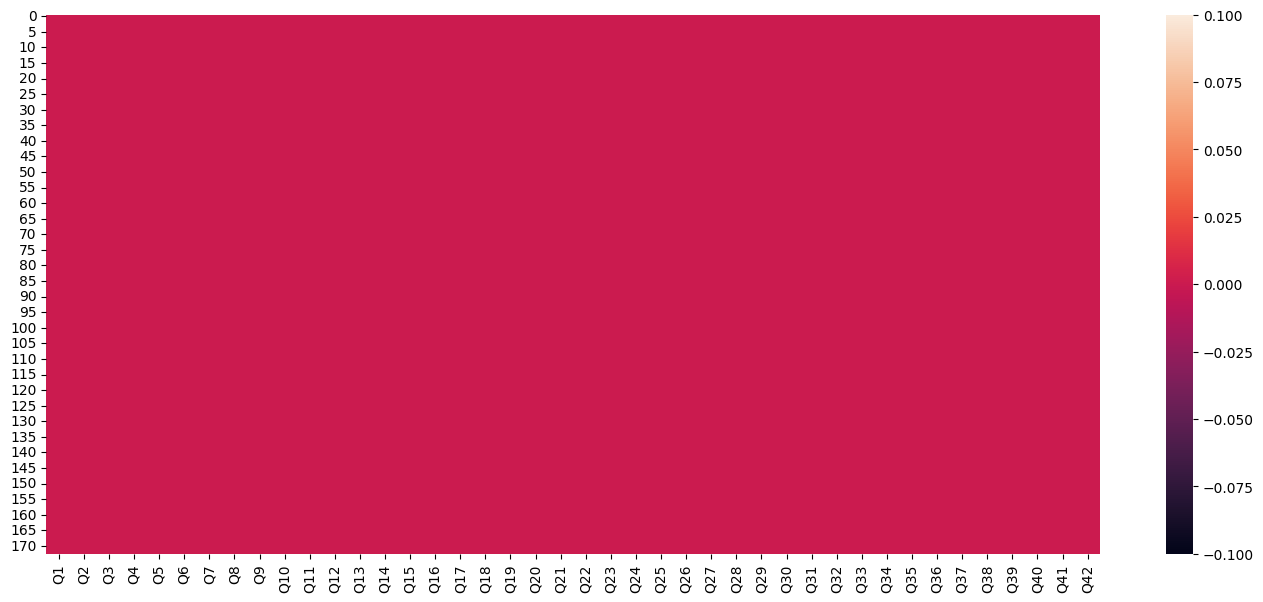

In [57]:
plt.figure(figsize=(17, 7))
sns.heatmap(x.isnull())

In [59]:
# dt['emply'] = dt['emply'].map({ 'Student': 1,  'Unemployed': 1, 'Self-employed': 2, 'Employed full-time': 3 })

In [277]:
x['total_count']  = x.sum(axis=1)
x.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q34,Q35,Q36,Q37,Q38,Q39,Q40,Q41,Q42,total_count
0,1,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,1,1,0,0,7
1,1,0,0,0,0,1,0,0,0,0,...,3,0,3,0,0,0,1,0,0,20
2,1,0,0,0,1,1,0,0,1,0,...,0,1,1,0,0,1,1,1,1,37
3,1,1,0,0,0,1,0,1,3,1,...,1,1,1,1,1,1,1,0,3,43
4,1,0,2,2,2,0,3,0,2,2,...,2,1,1,2,2,1,2,1,1,62


<ipython-input-201-66414def2312>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=x['total_count'])


<Axes: ylabel='Density'>

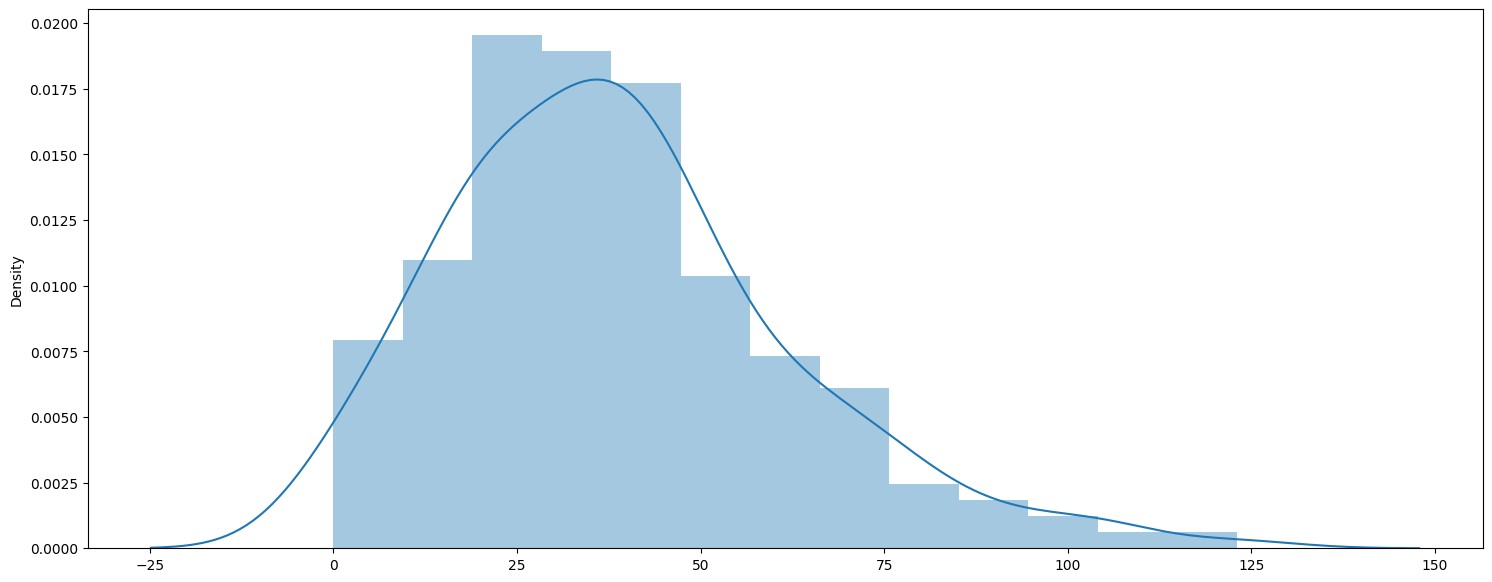

In [201]:
plt.figure(figsize=(18, 7))
sns.distplot(x=x['total_count'])

In [62]:
# x[x['total_count'] < 38.6]['total_count'].describe()

**Here we rename the columns for better visual representation**

In [278]:
x['total_count'].describe()

count    173.000000
mean      38.578035
std       23.214645
min        0.000000
25%       21.000000
50%       36.000000
75%       49.000000
max      123.000000
Name: total_count, dtype: float64

Moderate 36

In [279]:
x[x['total_count'] < 36]['total_count'].describe()

count    81.000000
mean     19.888889
std      10.027462
min       0.000000
25%      14.000000
50%      20.000000
75%      27.000000
max      35.000000
Name: total_count, dtype: float64

Mild 20

In [280]:
x[x['total_count'] < 20]['total_count'].describe()

count    35.000000
mean     10.542857
std       6.630335
min       0.000000
25%       5.500000
50%      12.000000
75%      16.500000
max      19.000000
Name: total_count, dtype: float64

Normal 12

In [281]:
x[x['total_count'] > 36]['total_count'].describe()

count     83.000000
mean      57.096386
std       18.424278
min       37.000000
25%       43.000000
50%       50.000000
75%       66.000000
max      123.000000
Name: total_count, dtype: float64

Severe 50 and below ```  Extremely Severe 50+

In [282]:
def buildTarget(value):
    if value <= 12:
        return 'Normal'
    if 12 < value <= 20:
        return 'Mild'
    if 20 < value <= 36:
        return 'Moderate'
    if 36 < value <= 50:
        return 'Severe'
    if value > 50:
        return 'Extremely Severe'

In [283]:
x['target'] = x['total_count'].apply(buildTarget)

In [232]:
x.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q35,Q36,Q37,Q38,Q39,Q40,Q41,Q42,total_count,target
0,1,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,1,0,0,7,Normal
1,1,0,0,0,0,1,0,0,0,0,...,0,3,0,0,0,1,0,0,20,Mild
2,1,0,0,0,1,1,0,0,1,0,...,1,1,0,0,1,1,1,1,37,Severe
3,1,1,0,0,0,1,0,1,3,1,...,1,1,1,1,1,1,0,3,43,Severe
4,1,0,2,2,2,0,3,0,2,2,...,1,1,2,2,1,2,1,1,62,Extremely Severe


##Data visualization

<Axes: xlabel='target', ylabel='count'>

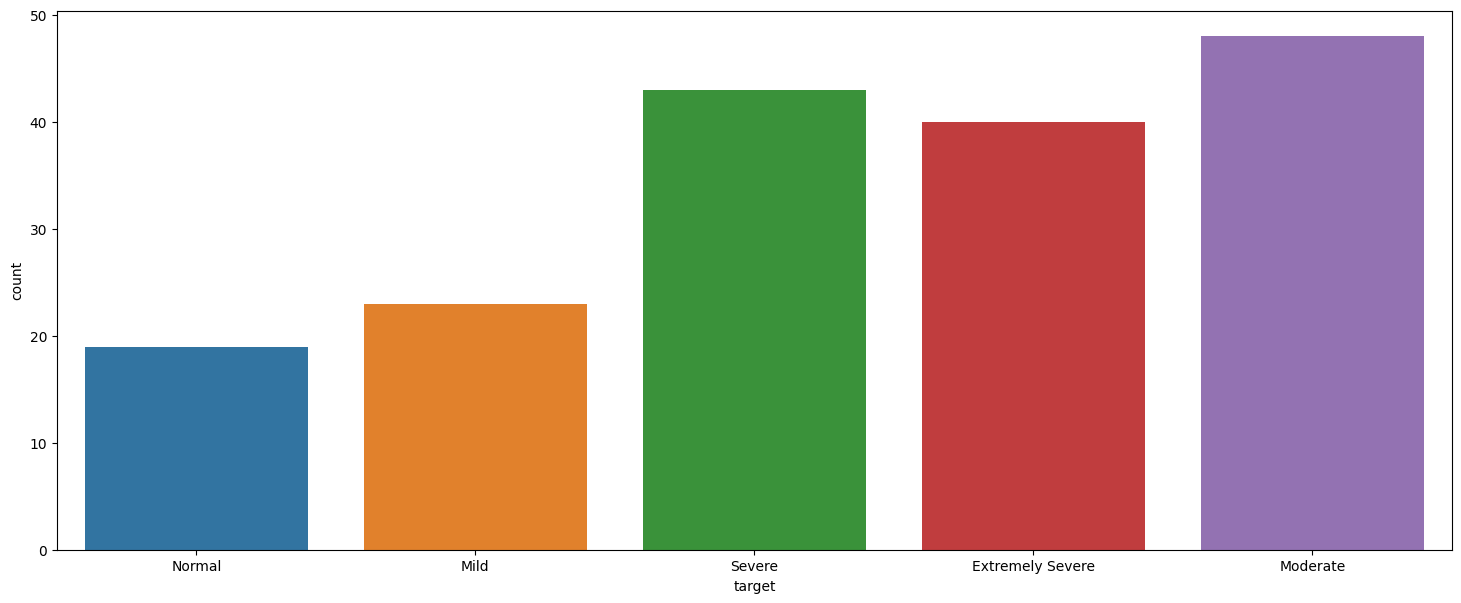

In [70]:
plt.figure(figsize=(18, 7))
sns.countplot(x=x['target'])

In [71]:
x.columns

Index(['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11',
       'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21',
       'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q30', 'Q31',
       'Q32', 'Q33', 'Q34', 'Q35', 'Q36', 'Q37', 'Q38', 'Q39', 'Q40', 'Q41',
       'Q42', 'total_count', 'target'],
      dtype='object')

# Phase 1 DASS 42 model Analysis

## Data Splitting Begins

To get the accurate model prediction we have to run these cell first for each model, as the name of the variables are same and to avoid repetation we have wrote them in same variables

In [284]:
target = x['target']
x.drop(['target', 'total_count'], axis=1, inplace=True)

In [285]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, target,  test_size = 0.36, random_state = 0)

print(f'x_train: {x_train.shape}, y_train: {y_train.shape}')
print(f'x_test: {x_test.shape}, y_test: {y_test.shape}')

x_train: (110, 42), y_train: (110,)
x_test: (63, 42), y_test: (63,)


In [286]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = MinMaxScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

## Random Forest Model

In [287]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=2)
rnd_clf.fit(x_train_scaled, y_train)

RandomForestClassifier(n_jobs=-1, random_state=2)

In [288]:
rnd_clf.score(x_test_scaled, y_test)

0.7142857142857143

In [289]:
# Predict
from sklearn.metrics import confusion_matrix 

y_pred_rnd = rnd_clf.predict(x_test_scaled)

confusion_matrix(y_test, y_pred_rnd)

array([[13,  0,  0,  0,  3],
       [ 0,  2,  4,  0,  0],
       [ 0,  3, 12,  0,  3],
       [ 0,  1,  0,  7,  0],
       [ 3,  0,  1,  0, 11]])

In [290]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_rnd))

                  precision    recall  f1-score   support

Extremely Severe       0.81      0.81      0.81        16
            Mild       0.33      0.33      0.33         6
        Moderate       0.71      0.67      0.69        18
          Normal       1.00      0.88      0.93         8
          Severe       0.65      0.73      0.69        15

        accuracy                           0.71        63
       macro avg       0.70      0.68      0.69        63
    weighted avg       0.72      0.71      0.72        63



In [291]:
# Cross Validation
from sklearn.model_selection import cross_val_score

cross_score = cross_val_score(classifier, x_train, y_train, cv=10)
print(f'Mean Score {np.mean(cross_score)}')

Mean Score 0.7090909090909091


**We got 70% accuracy in Random Forest**

## SVM model coming

In [161]:
from sklearn.svm import SVC

svc_clf = SVC()

svc_clf.fit(x_train_scaled, y_train)

SVC()

In [163]:
svc_clf.score(x_test_scaled, y_test) 

0.746031746031746

In [164]:
from sklearn.metrics import classification_report

y_pred_svc = svc_clf.predict(x_test_scaled)

print(classification_report(y_test, y_pred_svc))

                  precision    recall  f1-score   support

Extremely Severe       0.88      0.88      0.88        16
            Mild       0.50      0.67      0.57         6
        Moderate       0.79      0.61      0.69        18
          Normal       1.00      0.75      0.86         8
          Severe       0.63      0.80      0.71        15

        accuracy                           0.75        63
       macro avg       0.76      0.74      0.74        63
    weighted avg       0.77      0.75      0.75        63



In [162]:
# Cross Validation
from sklearn.model_selection import cross_val_score

cross_score = cross_val_score(svc_clf, x_train_scaled, y_train, cv=5)
print(f'Mean Score {np.mean(cross_score)}')

Mean Score 0.8090909090909092


**We got 80.9% accuracy in SVM model**

## Naive Bayes model

In [212]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

In [213]:
y_pred = classifier.predict(x_test)

In [215]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[14  0  0  0  2]
 [ 0  2  4  0  0]
 [ 0  1 11  0  6]
 [ 0  5  0  3  0]
 [ 4  0  0  0 11]]


0.6507936507936508

In [216]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

                  precision    recall  f1-score   support

Extremely Severe       0.78      0.88      0.82        16
            Mild       0.25      0.33      0.29         6
        Moderate       0.73      0.61      0.67        18
          Normal       1.00      0.38      0.55         8
          Severe       0.58      0.73      0.65        15

        accuracy                           0.65        63
       macro avg       0.67      0.59      0.59        63
    weighted avg       0.70      0.65      0.65        63



In [214]:
# Cross Validation
from sklearn.model_selection import cross_val_score

cross_score = cross_val_score(classifier, x_train, y_train, cv=5)
print(f'Mean Score {np.mean(cross_score)}')

Mean Score 0.7


We got 70% in naive bayes model using CV

## Kernal SVM

In [236]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(x_train, y_train)

SVC(random_state=0)

In [237]:
y_pred = classifier.predict(x_test)

In [239]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[14  0  0  0  2]
 [ 0  4  2  0  0]
 [ 0  2 11  0  5]
 [ 0  2  0  6  0]
 [ 2  0  1  0 12]]


0.746031746031746

In [240]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

                  precision    recall  f1-score   support

Extremely Severe       0.88      0.88      0.88        16
            Mild       0.50      0.67      0.57         6
        Moderate       0.79      0.61      0.69        18
          Normal       1.00      0.75      0.86         8
          Severe       0.63      0.80      0.71        15

        accuracy                           0.75        63
       macro avg       0.76      0.74      0.74        63
    weighted avg       0.77      0.75      0.75        63



In [238]:
# Cross Validation
from sklearn.model_selection import cross_val_score

cross_score = cross_val_score(classifier, x_train, y_train, cv=5)
print(f'Mean Score {np.mean(cross_score)}')

Mean Score 0.8090909090909092


**We got 80% in kernal after using CV method**

# Phase 2 NLP

In [241]:
dtc=pd.read_csv('./sample_data/dataset_mentalHealth.tsv', delimiter = '\t',quoting=3)

In [242]:
snti = dtc.iloc[:,-2].values

In [ ]:
print(snti)

In [244]:
import re
import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0,173):
  review = re.sub(r'[\W_]+'," ", str(snti[i]))
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [245]:
print(corpus)

['good god grace noth bother', 'feel kind loneli happi', 'lot misunderstand due uncondit relat', 'empti dead insid', 'happi', 'lone', 'feel suicid thought', 'feel pretti good suffer imagin realiti therefor not much make sad', 'nil', 'scare', 'good', 'ok ok', 'feel happi sinc exam end', 'feel blank day lost interest almost everyth want find someth interest life feel emot unavail', 'good', 'not good not bad', 'good', 'ye', 'feel simpli express sort disobedi parent ignor advic henc stress even trivial task els everyth seem perfect seek advic elder take step accordingli', 'colleg student felt homesick lone may trust issu conflict close peopl left feel sad push thing way far', 'anushka rn good coz home rn', 'alright', 'roller coaster emot late tri cope everyth happen around hope everyth okay', 'vari good feel', 'bore feel not sleep earli procrastin get', 'stress', 'name anshika singh feel good', 'swedeshna mishra recent feel ok happi', 'never felt better', 'happi help understand self', 'som

## Bag of word

In [253]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 460)
BOW = cv.fit_transform(corpus).toarray()
TGT = y

In [254]:
len(BOW[0])

460

## Naive Bayes model

In [255]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(BOW, TGT,  test_size = 0.36, random_state = 2)

In [256]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

In [263]:
y_pred = classifier.predict(x_test)

In [264]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 7 12]
 [22 22]]


0.4603174603174603

In [266]:
# Cross Validation
from sklearn.model_selection import cross_val_score

cross_score = cross_val_score(svc_clf, x_train_scaled, y_train, cv=10)
print(f'Mean Score {np.mean(cross_score)*100}')

Mean Score 80.90909090909092


**We got 80.9% in Naive Bayes in CV**